In [42]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import NullFormatter
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

In [47]:
function='leaky_ReLU'
d=pd.read_csv('../data/'+ 'errors_statistics' + str(function) + '.csv')
display(d)

,Unnamed: 0,sigma,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,...,rmse_mdl_train_std,rmse_mdl_test_std,mae_nn_train_sdm,mae_nn_test_sdm,mae_mdl_train_sdm,mae_mdl_test_sdm,rmse_nn_train_sdm,rmse_nn_test_sdm,rmse_mdl_train_sdm,rmse_mdl_test_sdm
0,0,0.06,0.022926,0.138846,0.021438,0.393304,0.030396,0.151697,0.026201,0.656841,...,0.009934,2.679587,0.002822,0.016739,0.001738,0.259876,0.003924,0.016968,0.001912,0.515687
1,1,0.08,0.030155,0.133946,0.028633,0.161897,0.039150,0.145990,0.036684,0.180181,...,0.019986,0.135553,0.002580,0.014954,0.002857,0.024756,0.003278,0.015363,0.003846,0.026087
2,2,0.10,0.043011,0.170464,0.039026,0.197208,0.055253,0.185085,0.048659,0.214710,...,0.026403,0.148304,0.004466,0.026173,0.004215,0.027167,0.005221,0.026393,0.005081,0.028541
3,3,0.12,0.090469,0.672278,0.041327,0.174468,0.169040,0.685238,0.050646,0.191976,...,0.026478,0.167788,0.016008,0.139670,0.004509,0.027839,0.037120,0.138660,0.005096,0.032291
4,4,0.14,0.060481,0.250801,0.053748,0.268820,0.082092,0.263700,0.064954,0.284991,...,0.034811,0.134604,0.006942,0.054622,0.005842,0.025146,0.010799,0.054725,0.006699,0.025904
5,5,0.16,0.074424,0.383870,0.056738,0.195993,0.109797,0.400310,0.068208,0.208397,...,0.042382,0.135475,0.009805,0.086760,0.007022,0.025277,0.020712,0.086807,0.008156,0.026072
6,6,0.18,0.072528,0.362814,0.054151,0.267464,0.101848,0.377574,0.067815,0.286291,...,0.036281,0.154245,0.009529,0.083175,0.005779,0.028605,0.017041,0.082997,0.006982,0.029685
7,7,0.20,0.077405,0.174527,0.070661,0.243512,0.102722,0.188062,0.083693,0.258529,...,0.041819,0.127100,0.006093,0.031607,0.007060,0.024304,0.008227,0.033084,0.008048,0.024460


In [48]:
#Plot rmse
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 14*cm; height=7*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

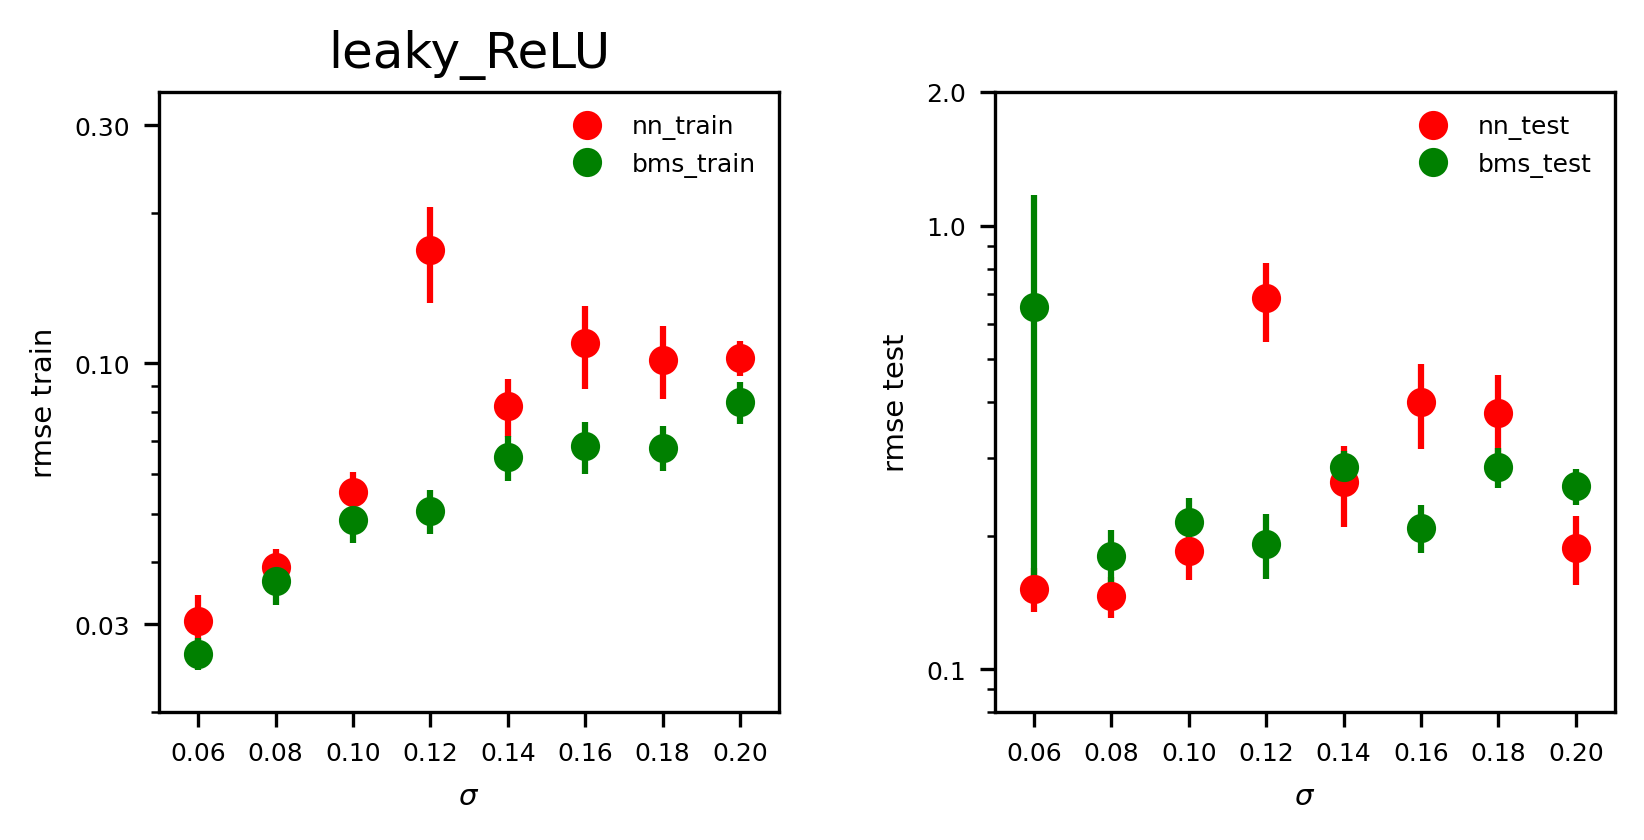

In [50]:
fig=figure(figsize=(width,height), dpi=300)  

rows=1;cols=2
gs=gridspec.GridSpec(rows,cols)                                                                                                                                                   
gs.update(left=0.1,right=0.98,bottom=0.15,top=0.90,wspace=0.35,hspace=0.1)     

ax_00=plt.subplot(gs[0,0])  

plt.title(function)
plt.errorbar(d.sigma, d.rmse_nn_train, yerr=d.rmse_nn_train_sdm, marker='o', \
             markersize=m_size, color='red', linestyle='none',label='nn_train')
plt.errorbar(d.sigma, d.rmse_mdl_train, yerr=d.rmse_mdl_train_sdm, marker='o', \
             markersize=m_size, color='green', linestyle='none',label='bms_train')

plt.legend(loc='best',fontsize=size_ticks,frameon=False)
plt.xlabel(r'$\sigma$', fontsize=size_axis)
plt.ylabel('rmse train', fontsize=size_axis)

plt.xticks(d.sigma,fontsize=size_ticks)
plt.xlim(0.05, 0.21)

plt.yscale('log')
yticks_labels=[0.03,1e-1,0.3] 
plt.yticks(yticks_labels,fontsize=size_ticks)
ax_00.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylim(2e-2,0.35)

ax_01=plt.subplot(gs[0,1])

plt.errorbar(d.sigma, d.rmse_nn_test, yerr=d.rmse_nn_test_sdm, marker='o', \
             markersize=m_size, color='red', linestyle='none',label='nn_test')
plt.errorbar(d.sigma, d.rmse_mdl_test, yerr=d.rmse_mdl_test_sdm, marker='o', \
             markersize=m_size, color='green', linestyle='none',label='bms_test')

plt.legend(loc='best',fontsize=size_ticks,frameon=False)
plt.xlabel(r'$\sigma$', fontsize=size_axis)
plt.ylabel('rmse test', fontsize=size_axis)

plt.xticks(d.sigma, fontsize=size_ticks)
plt.xlim(0.05, 0.21)

plt.yscale('log')
yticks_labels=[0.1,1,2] 
plt.yticks(yticks_labels,fontsize=size_ticks)
ax_01.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylim(0.08,2)

output_path='../results/'
name_fig='rmse_sigma_' + str(function) + '_'

plt.savefig(output_path+name_fig+'.svg',dpi=300)

plt.show()

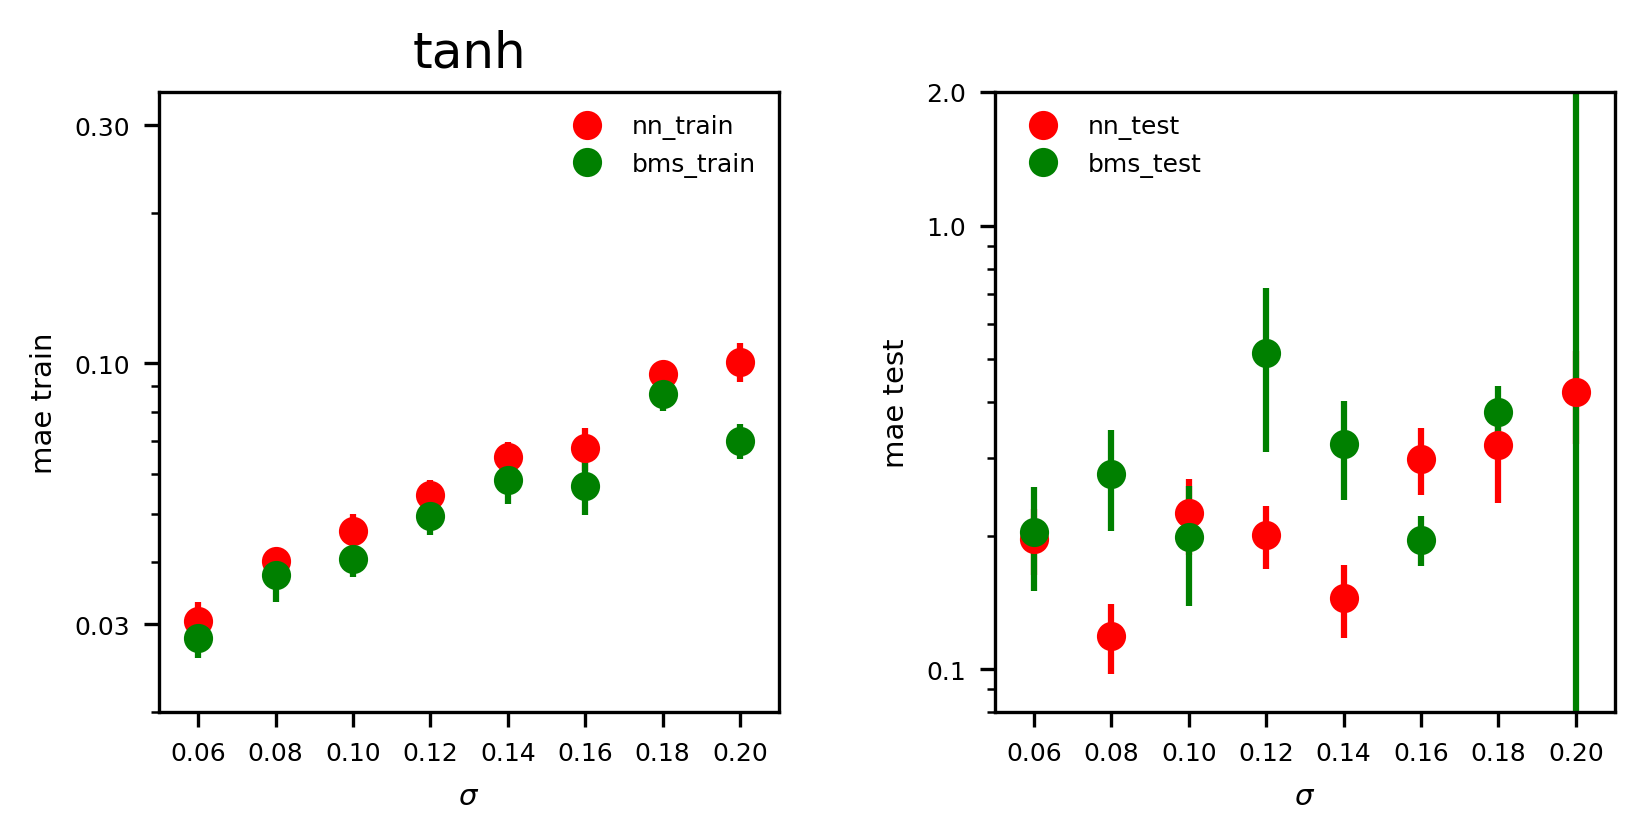

In [46]:
fig=figure(figsize=(width,height), dpi=300)  

rows=1;cols=2
gs=gridspec.GridSpec(rows,cols)                                                                                                                                                   
gs.update(left=0.1,right=0.98,bottom=0.15,top=0.90,wspace=0.35,hspace=0.1)     

ax_00=plt.subplot(gs[0,0])  

plt.title(function)
plt.errorbar(d.sigma, d.mae_nn_train, yerr=d.mae_nn_train_sdm, marker='o', \
             markersize=m_size, color='red', linestyle='none',label='nn_train')
plt.errorbar(d.sigma, d.mae_mdl_train, yerr=d.mae_mdl_train_sdm, marker='o', \
             markersize=m_size, color='green', linestyle='none',label='bms_train')

plt.legend(loc='best',fontsize=size_ticks,frameon=False)
plt.xlabel(r'$\sigma$', fontsize=size_axis)
plt.ylabel('mae train', fontsize=size_axis)

plt.xticks(d.sigma,fontsize=size_ticks)
plt.xlim(0.05, 0.21)

plt.yscale('log')
yticks_labels=[0.03,1e-1,0.3] 
plt.yticks(yticks_labels,fontsize=size_ticks)
ax_00.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylim(2e-2,0.35)

ax_01=plt.subplot(gs[0,1])

plt.errorbar(d.sigma, d.mae_nn_test, yerr=d.mae_nn_test_sdm, marker='o', \
             markersize=m_size, color='red', linestyle='none',label='nn_test')
plt.errorbar(d.sigma, d.mae_mdl_test, yerr=d.mae_mdl_test_sdm, marker='o', \
             markersize=m_size, color='green', linestyle='none',label='bms_test')

plt.legend(loc='best',fontsize=size_ticks,frameon=False)
plt.xlabel(r'$\sigma$', fontsize=size_axis)
plt.ylabel('mae test', fontsize=size_axis)

plt.xticks(d.sigma, fontsize=size_ticks)
plt.xlim(0.05, 0.21)

plt.yscale('log')
yticks_labels=[0.1,1,2] 
plt.yticks(yticks_labels,fontsize=size_ticks)
ax_01.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.ylim(0.08,2)

output_path='../results/'
name_fig='mae_sigma_' + str(function) + '_'

plt.savefig(output_path+name_fig+'.svg',dpi=300)

plt.show()


In [8]:
#Plot
train_size_ann=50
validation_border=dn.loc[train_size_ann-1]['x1']
train_border=dn.loc[train_size-1]['x1']

 
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


fig=figure(figsize=(width,height), dpi=300)                                                        


plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann.  MSE_train= %.2E, MSE_test= %.2E' % ( MSE_nn_train, MSE_nn_test)) 
plt.plot(dplot.x1, dplot.ybms, color='green', linestyle='--',label='mdl.  MSE_train= %.2E, MSE_test= %.2E' % ( MSE_mdl_train, MSE_mdl_test)) 
plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue',label='observed') 
plt.plot(dn['x1'], dn['y_noise'],linewidth=line_w, markersize=2, color='orange',label='noise, ' + r'$\sigma$=' + str(sigma) ) 
                                                                                

plt.axvline(x=validation_border,linestyle='--',linewidth=line_w, color='r')
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

#plt.title('$%s$' % t.latex(),fontsize=size_title)
plt.title('n=%d, r=%d : $%s$' % (n, realization, t.latex()),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', fontsize=size_ticks)

plt.xlim(-2,2);plt.ylim(-0.5,1.5)                                               

Name_figure='Prediction_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)
    
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

plt.show()

NameError: name 'dn' is not defined